In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,precision_score,accuracy_score,recall_score,confusion_matrix

In [2]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-9 Random_Forest_Classification_Prospect_Hotel_Booking_Cancellation

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-9 Random_Forest_Classification_Prospect_Hotel_Booking_Cancellation


# Part-1: data Exploration and Pre-processing


In [3]:
# 1) load the given dataset
df=pd.read_csv("Python_Project_9_Random_Forest.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [15]:
# 2) Print the unique values in all columns

for i in df.columns:
    print(i)
    print("--"*10)
    print(df[i].unique())
    print()
    

hotel
--------------------
['Resort Hotel' 'City Hotel']

is_canceled
--------------------
[0 1]

lead_time
--------------------
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200

In [16]:
df.shape

(119390, 32)

In [17]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
# 3) Fill nan value in country with ‘other’
df["country"] = df["country"].fillna("other")

In [19]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'other', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA'

In [20]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
# 4) Fill nan in agent with mean of agent columns
df["agent"] = df["agent"].fillna(df["agent"].mean())

In [23]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [26]:
df["company"] = df["company"].fillna(df["company"].mean())

In [27]:
df["company"].head()

0    189.266735
1    189.266735
2    189.266735
3    189.266735
4    189.266735
Name: company, dtype: float64

In [28]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [29]:
# 5) Drop all the remaining null values
df=df.dropna()

In [30]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [34]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<AxesSubplot:xlabel='adults', ylabel='count'>

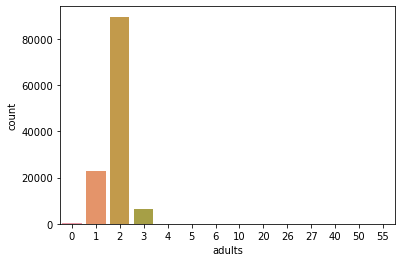

In [45]:
# 6) Plot the count of adult and children with help of a bar plot
sns.countplot(x="adults",data=df)

<AxesSubplot:xlabel='children', ylabel='count'>

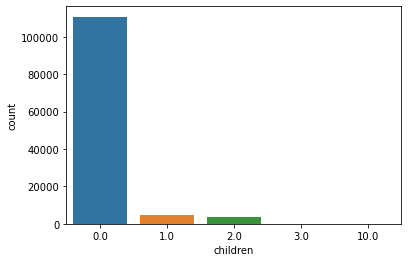

In [46]:
sns.countplot(x="children",data=df)

In [47]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [48]:
df.drop("reservation_status_date",axis=1,inplace=True)

In [49]:
# 7) Perform Label encoding on categorical columns
from sklearn.preprocessing import LabelEncoder

In [51]:
label=LabelEncoder()

In [54]:
df['hotel'] = label.fit_transform(df['hotel'])
df['meal'] = label.fit_transform(df['meal'])
df['country'] = label.fit_transform(df['country'])
df['market_segment'] = label.fit_transform(df['market_segment'])
df['distribution_channel'] = label.fit_transform(df['distribution_channel'])
df['deposit_type'] = label.fit_transform(df['deposit_type'])
df['customer_type'] = label.fit_transform(df['customer_type'])
df['reservation_status'] = label.fit_transform(df['reservation_status'])
df['reserved_room_type'] = label.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = label.fit_transform(df['assigned_room_type'])
df['arrival_date_year'] = label.fit_transform(df['arrival_date_year'])
df['arrival_date_month'] = label.fit_transform(df['arrival_date_month'])

In [55]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,0,5,27,1,0,0,2,...,3,0,86.693382,189.266735,0,2,0.0,0,0,1
1,1,0,737,0,5,27,1,0,0,2,...,4,0,86.693382,189.266735,0,2,0.0,0,0,1
2,1,0,7,0,5,27,1,0,1,1,...,0,0,86.693382,189.266735,0,2,75.0,0,0,1
3,1,0,13,0,5,27,1,0,1,1,...,0,0,304.000000,189.266735,0,2,75.0,0,0,1
4,1,0,14,0,5,27,1,0,2,2,...,0,0,240.000000,189.266735,0,2,98.0,0,1,1


In [56]:
df.shape

(119386, 31)

# Part 2 Model Building


In [58]:
x=df.drop('is_canceled',axis=1)
y=df.is_canceled

In [59]:
x.shape

(119386, 30)

In [61]:
y.shape

(119386,)

In [62]:
# 1. Create features and target data
from sklearn.model_selection import train_test_split

In [163]:
# 2. Split into training & testing
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [164]:
x_train
x_train.shape

(95508, 30)

In [165]:
x_test
x_test.shape

(23878, 30)

In [166]:
y_train
y_train.shape

(95508,)

In [167]:
y_test
y_test.shape

(23878,)

In [168]:
# 3. Apply Random forest classifier on data
model=RandomForestClassifier()

In [169]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [170]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [171]:
model.score(x_train,y_train)

1.0

In [172]:
model.score(x_test,y_test)

0.9999581204455985

In [173]:
# 4. Create function which show Precision score, recall score, accuracy, classification report and confusion matrix.
def info(y_test,y_predict):
    print("Precision_score =",precision_score(y_test,y_predict))
    print("recall_score =",recall_score(y_test,y_predict))
    print("Accuracy =",accuracy_score(y_test,y_predict))
    print()
    print("confusion_matrix is :")
    print(confusion_matrix(y_test,y_predict))
    print()
    print("Classificationreport is :")
    print(classification_report(y_test,y_predict))

In [174]:
info (y_test,y_predict)

Precision_score = 1.0
recall_score = 0.9998894539022772
Accuracy = 0.9999581204455985

confusion_matrix is :
[[14832     0]
 [    1  9045]]

Classificationreport is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14832
           1       1.00      1.00      1.00      9046

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

